# Лабораторная работа №3. Синтез БИХ-фильтров




In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
import soundfile as sf

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
plt.rcParams.update({'font.size': 22})

## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | 0.25 | 0.2 | 0.1 |  — | — | — |
|$\theta_0$ | — | — | — | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

In [5]:
nu_0 = 0.2
theta = 2 * np.pi * nu_0
A = 0.8

zeros = np.array((-1, 1))
poles = np.array((A*np.exp(1j*theta), A*np.exp(-1j*theta)))
k = (1 - A)*np.sqrt(1 + A**2 - 2*A*np.cos(2*theta))/2/abs(np.sin(theta))

res = signal.dlti(zeros, poles, k, dt=1)
thetas = np.linspace(-np.pi, +np.pi, 10000)
_, H = signal.dfreqresp(res, w=thetas)

$$
\theta_0 = 2 \pi \nu_0 = 0.4\pi.
$$

$$\mathcal{H}(z)=
\dfrac{\mathcal{K}(1-z^{-1})(1+z^{-1})}
{\left( 1-\mathcal{A}\exp (j{{\theta }_{0}}){{z}^{-1}} \right)  \left( 1-\mathcal{A}\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)} =
\dfrac{{\mathcal{K}}(1 - z^{-2})}{1 - 2\mathcal{A} \cos(\theta_0) z^{-1} + \mathcal{A}^2 z^{-2}}.
$$

<center>
Коэффициент  $\mathcal{K}$ выберем, исходя из нормировки на резонансных частотах:
$$\mathcal{K} =  \dfrac{|(1 - \mathcal{A})(1 - \mathcal{A}e^{-2j\theta})|}{|1 - e^{-2j\theta}|} =
\dfrac{(1 - \mathcal{A})\cdot |1 -  \mathcal{A}\cos(2\theta_0) + j \mathcal{A}\sin(2\theta_0)|}{|1 -  \cos(2\theta_0) + j \sin(2\theta_0)|} = 
\dfrac{(1 - \mathcal{A}) \sqrt{1 + \mathcal{A}^2 - 2\mathcal{A}\cos(2\theta_0)}}{\sqrt{2(1 - \cos(2\theta_0))}} = 
\dfrac{(1 - \mathcal{A}) \sqrt{1 + \mathcal{A}^2 - 2\mathcal{A}\cos(2\theta_0)}}{2|\sin(\theta_0)|}.$$
    

$$|\mathcal{H}(\theta)|=
\dfrac{\mathcal{K}(1 - e^{-2j\theta})}{\left|1 - 2\mathcal{A} \cos(\theta_0) e^{-j\theta} + \mathcal{A}^2 e^{-2j\theta}\right|}.
$$

<img src="img/1.png" style="height:700px">

<center>
Прямая форма фильтра.

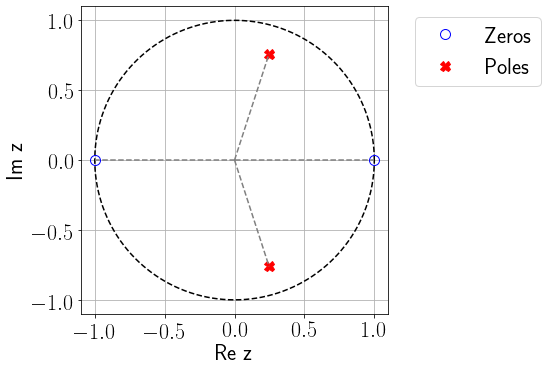

In [6]:
plt.figure(figsize=[8, 8])
t = np.linspace(0, 2*np.pi, 10000)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(zeros.real, zeros.imag, 'bo', ms = 10, fillstyle = 'none', label='Zeros')
plt.plot(poles.real, poles.imag, 'rX', ms = 10, label='Poles')

for u in zeros:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in poles:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

plt.xlabel("Re z")
plt.ylabel("Im z")

plt.tight_layout()

Оба полюса находятся внутри единичного круга, значит фильтр является устойчивым по входу.

$$
h[k] = \dfrac{1}{2\pi j} \oint \limits_{\gamma} \mathcal{H}(z)z^{k-1}dz =
\dfrac{1}{2\pi j} \oint \limits_{\gamma} \dfrac{\mathcal{K}(z+1)(z-1)z^{k-1}}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}dz =
\sum \limits_{p} \underset{z_p}{\text{res}} \left\{ \dfrac{\mathcal{K}(z+1)(z-1)z^{k-1}}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)} \right\}.
$$

<hr>

\begin{align*}
\underset{z_p = 0}{\text{res}} &\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\} = [k=0] = 
\underset{z_p = 0}{\text{res}} \left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})z}\right\} = 
\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}\right\}\Bigg|_{z=0} = 
\dfrac{\mathcal{K}(-1)(+1)}{(- \mathcal{A}e^{j\theta_0})(- \mathcal{A}e^{-j\theta_0})} =
-\dfrac{\mathcal{K}}{\mathcal{A}^2}.\\
\underset{z_p =\mathcal{A}e^{j\theta_0}}{\text{res}} &\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\} = 
\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\}\Bigg|_{z=\mathcal{A}e^{j\theta_0}} =
\dfrac{\mathcal{K}(\mathcal{A}e^{j\theta_0}-1)(\mathcal{A}e^{j\theta_0}+1)}{(\mathcal{A}e^{j\theta_0} - \mathcal{A}e^{-j\theta_0})}\left(\mathcal{A}e^{j\theta_0}\right)^{k-1} = 
\mathcal{K}\mathcal{A}^{k-2}\dfrac{(\mathcal{A}^2e^{2j\theta_0}-1)e^{j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.\\
\underset{z_p =\mathcal{A}e^{-j\theta_0}}{\text{res}} &\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\} = 
\left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})}z^{k-1}\right\}\Bigg|_{z=\mathcal{A}e^{-j\theta_0}} =
\dfrac{\mathcal{K}(\mathcal{A}e^{-j\theta_0}-1)(\mathcal{A}e^{-j\theta_0}+1)}{(\mathcal{A}e^{-j\theta_0} - \mathcal{A}e^{j\theta_0})}\left(\mathcal{A}e^{-j\theta_0}\right)^{k-1} = 
-\mathcal{K}\mathcal{A}^{k-2}\dfrac{(\mathcal{A}^2e^{-2j\theta_0}-1)e^{-j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.
\end{align*}

\begin{align*}
&\underset{z_p =\mathcal{A}e^{j\theta_0}}{\text{res}} \left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\} +
\underset{z_p =\mathcal{A}e^{-j\theta_0}}{\text{res}} \left\{\dfrac{\mathcal{K}(z-1)(z+1)}{(z - \mathcal{A}e^{j\theta_0})(z - \mathcal{A}e^{-j\theta_0})}z^{k-1}\right\} =
\mathcal{K}\mathcal{A}^{k-2}\dfrac{(\mathcal{A}^2e^{2j\theta_0}-1)e^{j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}
-\mathcal{K}\mathcal{A}^{k-2}\dfrac{(\mathcal{A}^2e^{-2j\theta_0}-1)e^{-j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})} = \\&=
\dfrac{\mathcal{K}\mathcal{A}^{k-2}}{(e^{j\theta_0} - e^{-j\theta_0})}\left((\mathcal{A}^2e^{2j\theta_0}-1)e^{j(k-1)\theta_0} - (\mathcal{A}^2e^{-2j\theta_0}-1)e^{-j(k-1)\theta_0}\right) =
\dfrac{\mathcal{K}\mathcal{A}^{k-2}}{(e^{j\theta_0} - e^{-j\theta_0})}\left(\mathcal{A}^2e^{j(k+1)\theta_0} - \mathcal{A}^2e^{-j(k+1)\theta_0} - (e^{j(k-1)\theta_0} -e^{-j(k-1)\theta_0})\right) =
\mathcal{K}\mathcal{A}^{k-2}\cdot\dfrac{\mathcal{A}^2\sin(k+1)\theta_0 - \sin(k-1)\theta_0}{\sin\theta_0}.
\end{align*}

<hr>

\begin{equation*}
h[k] = \mathcal{K}\mathcal{A}^{k-2}\cdot\dfrac{\mathcal{A}^2\sin(k+1)\theta_0 - \sin(k-1)\theta_0}{\sin\theta_0}u[k] -\dfrac{\mathcal{K}}{\mathcal{A}^2}\delta[k].
\end{equation*}

$$
\mathcal{G}(z) = \mathcal{H}(z)\mathcal{U}(z) = 
\dfrac{\mathcal{K}(z-1)(z+1)}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}\dfrac{z}{z-1} =
\dfrac{\mathcal{K}(z+1)z}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}.
$$

<hr>

$$
g[k] = \dfrac{1}{2\pi j} \oint \limits_{\gamma} \mathcal{G}(z)z^{k-1}dz =
\dfrac{1}{2\pi j} \oint \limits_{\gamma} \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}dz =
\sum \limits_{p} \underset{z_p}{\text{res}} \left\{ \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)} \right\} =
\underset{z_p = \mathcal{A}e^{j\theta_0}}{\text{res}} \left\{ \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)} \right\} + 
\underset{z_p = \mathcal{A}e^{-j\theta_0}}{\text{res}} \left\{ \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)} \right\}.
$$

\begin{align*}
\underset{z_p =\mathcal{A}e^{j\theta_0}}{\text{res}} &\left\{  \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}  \right\} = 
\left\{  \dfrac{\mathcal{K}(z+1)z^k}{z-\mathcal{A}e^{-j{\theta }_{0}}}  \right\}\Bigg|_{z=\mathcal{A}e^{j\theta_0}} =
\dfrac{\mathcal{K}(\mathcal{A}e^{j\theta_0}+1)}{(\mathcal{A}e^{j\theta_0} - \mathcal{A}e^{-j\theta_0})}\left(\mathcal{A}e^{j\theta_0}\right)^{k} = 
\mathcal{K}\mathcal{A}^{k-1}\dfrac{(\mathcal{A}e^{j\theta_0}+1)e^{jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.\\
\underset{z_p =\mathcal{A}e^{-j\theta_0}}{\text{res}} &\left\{  \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}  \right\} = 
\left\{  \dfrac{\mathcal{K}(z+1)z^k}{z-\mathcal{A}e^{j{\theta}_{0}}}  \right\}\Bigg|_{z=\mathcal{A}e^{-j\theta_0}} =
\dfrac{\mathcal{K}(\mathcal{A}e^{-j\theta_0}+1)}{(\mathcal{A}e^{-j\theta_0} - \mathcal{A}e^{j\theta_0})}\left(\mathcal{A}e^{-j\theta_0}\right)^{k} = 
-\mathcal{K}\mathcal{A}^{k-1}\dfrac{(\mathcal{A}e^{-j\theta_0}-1)e^{-jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.
\end{align*}

$$
\underset{z_p =\mathcal{A}e^{j\theta_0}}{\text{res}} \left\{  \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}  \right\} +
\underset{z_p =\mathcal{A}e^{-j\theta_0}}{\text{res}} \left\{  \dfrac{\mathcal{K}(z+1)z^k}{\left( z-\mathcal{A}e^{j{\theta}_{0}} \right)  \left( z-\mathcal{A}e^{-j{\theta }_{0}} \right)}  \right\} =
\mathcal{K}\mathcal{A}^{k-1}\dfrac{(\mathcal{A}e^{j\theta_0}+1)e^{jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})} -
\mathcal{K}\mathcal{A}^{k-1}\dfrac{(\mathcal{A}e^{-j\theta_0}-1)e^{-jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})} =
\dfrac{\mathcal{K}\mathcal{A}^{k-1}}{(e^{j\theta_0} - e^{-j\theta_0})}\left(\mathcal{A}e^{j(k+1)\theta_0} - \mathcal{A}e^{-j(k+1)\theta_0} + e^{jk\theta_0} -  e^{-jk\theta_0} \right) =
\mathcal{K}\mathcal{A}^{k-1}\cdot\dfrac{\mathcal{A}\sin(k+1)\theta_0 + \sin k\theta_0}{\sin\theta_0}.
$$

<hr>

$$
g[k] = \mathcal{K}\mathcal{A}^{k-1}\cdot\dfrac{\mathcal{A}\sin(k+1)\theta_0 + \sin k\theta_0}{\sin\theta_0}u[k].
$$

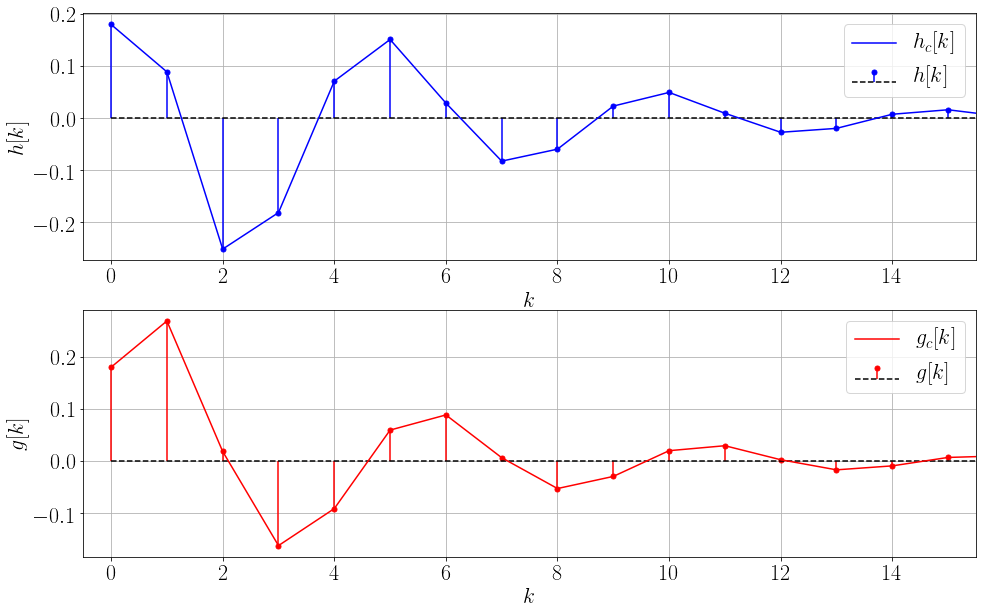

In [7]:
n = np.arange(20)
h_custom = k * A**(n-2) * (A**2 * np.sin((n+1)*theta) - np.sin((n-1)*theta))/np.sin(theta)
h_custom[0] += -k/A**2
g_custom = k * A**(n-1) * (A * np.sin((n+1)*theta) + np.sin(n*theta))/np.sin(theta)


plt.figure(figsize=(16,10))

plt.subplot(211)

t, h = signal.dimpulse(res, n=20)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)

plt.plot(n, h_custom, 'b', label="$h_c[k]$")

plt.grid()
plt.xlim(-0.5, 15.5)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.legend(loc = 'upper right')

plt.subplot(212)
t, g = signal.dstep(res, n=20)

t, h = signal.dimpulse(res, n=20)
ml, sl, bl = plt.stem(t, np.squeeze(g), 'r', basefmt = 'k--', markerfmt = 'ro', label="$g[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)

plt.plot(n, g_custom, 'r', label="$g_c[k]$")

plt.xlim(-0.5, 15.5)
plt.xlabel("$k$")
plt.ylabel("$g[k]$")
plt.legend(loc = 'upper right')
plt.grid()

plt.show()

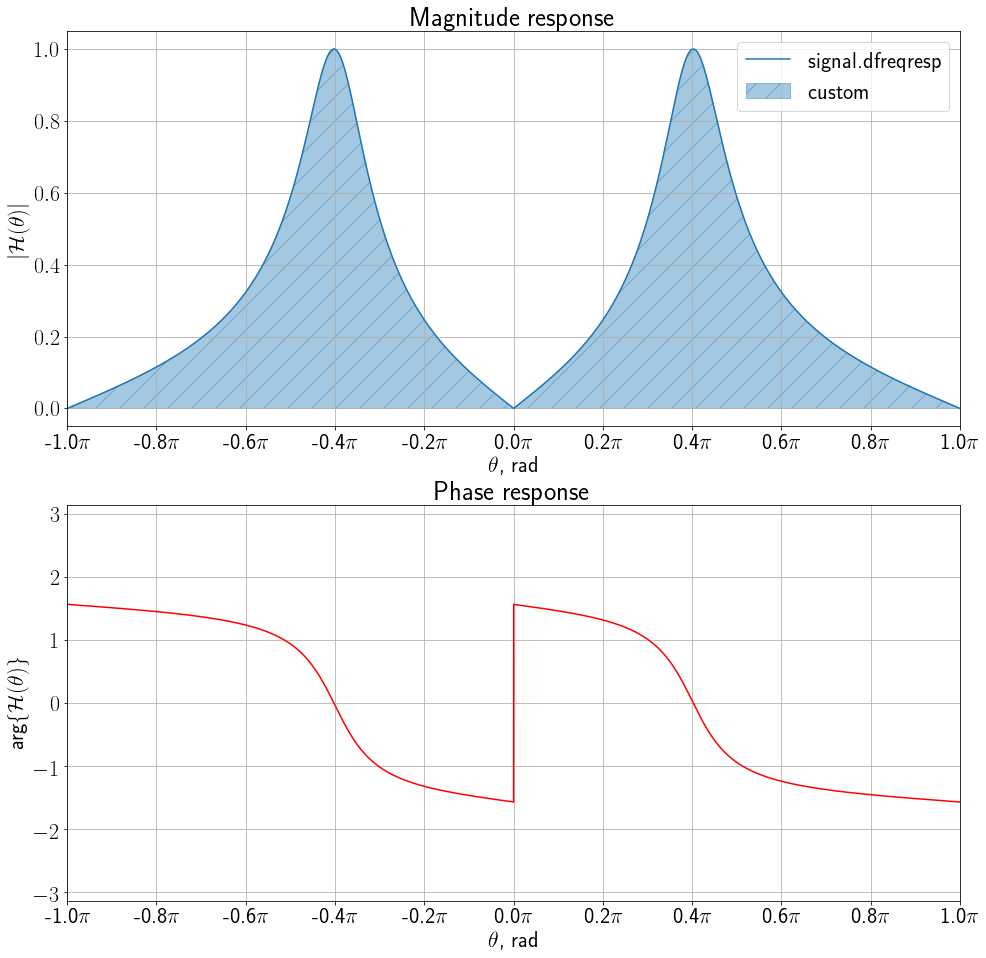

In [7]:
fig, ax = plt.subplots(figsize=(16, 16))
H_custom = k * (1 - np.exp(-2*1j*thetas))/ (1 - 2*A*np.cos(theta)*np.exp(-1j*thetas) + A**2 * np.exp(-2*1j*thetas))

plt.subplot(211)
plt.fill_between(thetas, abs(H_custom), color = 'C0', alpha = 0.4,  hatch = '/', label = 'custom')
plt.plot(thetas, abs(H), label = 'signal.dfreqresp')
plt.xlabel("$\\theta$, rad")
plt.ylabel("$|\mathcal{H}(\\theta)|$")
plt.title("Magnitude response")
plt.xlim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.legend()
plt.grid()
#plt.show()

plt.subplot(212)
plt.plot(thetas, np.angle(H), 'r')
plt.xlabel("$\\theta$, rad")
plt.ylabel("arg$\{\mathcal{H}(\\theta)\}$")
plt.title("Phase response")
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.grid()
plt.show()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


$$
\theta_0 = 2 \pi \dfrac{f_0}{f_d} = \dfrac{7}{10}\pi.
$$

$$\mathcal{H}(z)={\mathcal{K}}
\dfrac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}
{\left( 1-\mathcal{A}\exp (j{{\theta }_{0}}){{z}^{-1}} \right)  \left( 1-\mathcal{A}\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)} =
{\mathcal{K}} \dfrac{1 - 2\cos(\theta_0) z^{-1} + z^{-2}}{1 - 2\mathcal{A} \cos(\theta_0) z^{-1} + \mathcal{A}^2 z^{-2}}.
$$

<center>
Для нормировки на нулевой частоте выберем $\mathcal{K} =  \dfrac{1 - 2\mathcal{A} \cos(\theta_0) + \mathcal{A}^2}{2 - 2\cos(\theta_0)}.$
    

$$|\mathcal{H}(\theta)|={\mathcal{K}}
\Bigg| \dfrac{1 - 2\cos(\theta_0) e^{-j\theta} + z^{-2j\theta}}{1 - 2\mathcal{A} \cos(\theta_0) e^{-j\theta} + \mathcal{A}^2 e^{-2j\theta}} \Bigg|.
$$

<img src="img/2.png" style="height:700px">

<center>
Прямая каноническая форма фильтра.

In [8]:
f_0 = 350
f_d = 1000
theta = 2 * np.pi * f_0/f_d
A = 0.8

zeros = np.array((np.exp(1j*theta), np.exp(-1j*theta)))
poles = np.array((A*np.exp(1j*theta), A*np.exp(-1j*theta)))
k = (A**2 - 2*A*np.cos(theta) + 1) / (2 - 2*np.cos(theta))

hum = signal.dlti(zeros, poles, k, dt=1)
thetas = np.linspace(-np.pi, +np.pi, 10000)
_, H = signal.dfreqresp(hum, w=thetas)

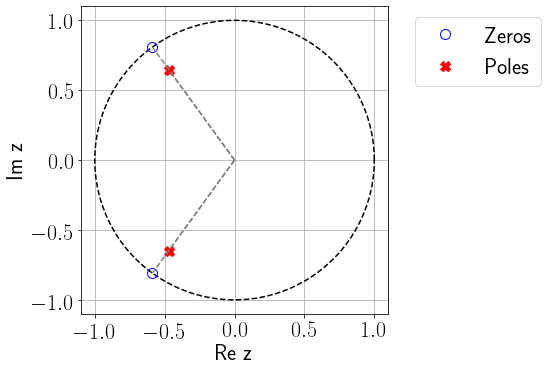

In [9]:
plt.figure(figsize=[8, 8])
t = np.linspace(0, 2*np.pi, 10000)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(zeros.real, zeros.imag, 'bo', ms = 10, fillstyle = 'none', label='Zeros')
plt.plot(poles.real, poles.imag, 'rX', ms = 10, label='Poles')

for u in zeros:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in poles:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)


plt.xlabel("Re z")
plt.ylabel("Im z")

plt.tight_layout()

Оба полюса находятся внутри единичного круга, значит фильтр является устойчивым по входу.

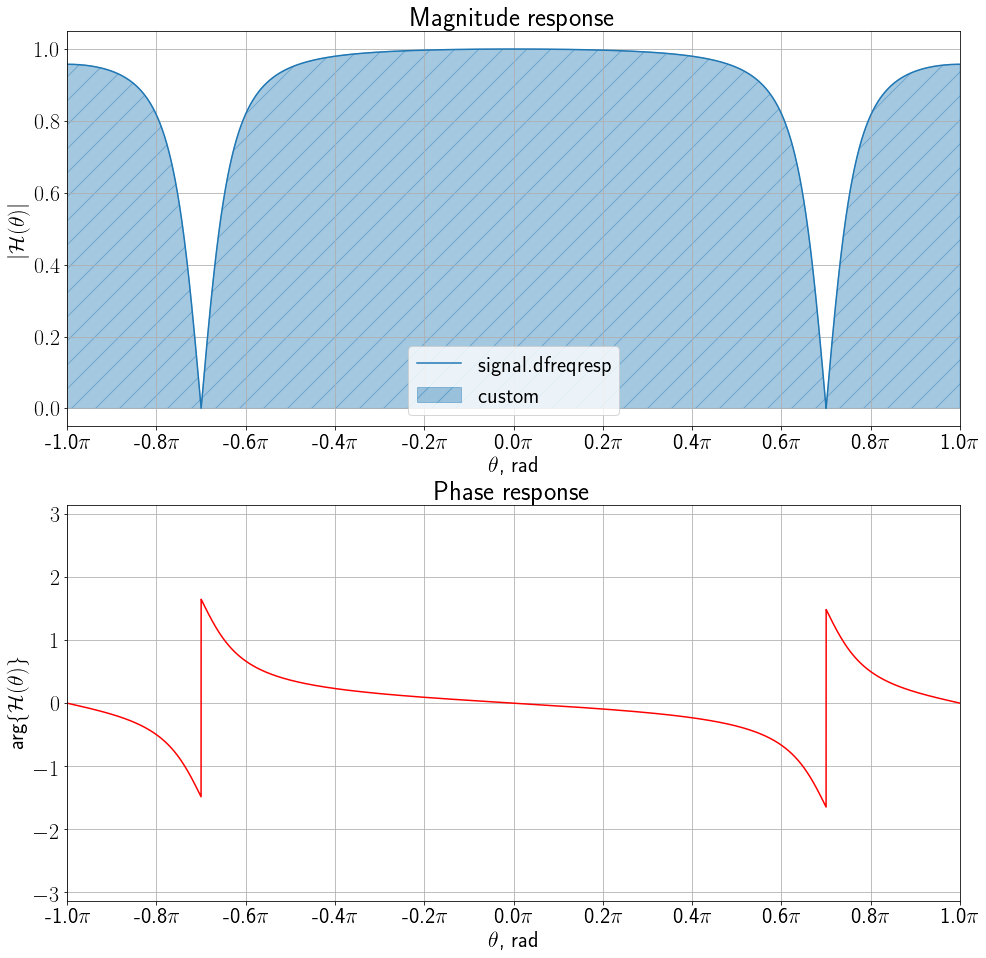

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))
H_custom = k * (1 - 2*np.cos(theta)*np.exp(-1j*thetas) + np.exp(-2*1j*thetas)) / (1 - 2*A*np.cos(theta)*np.exp(-1j*thetas) + A**2 * np.exp(-2*1j*thetas))

plt.subplot(211)
plt.fill_between(thetas, abs(H_custom), color = 'C0', alpha = 0.4,  hatch = '/', label = 'custom')
plt.plot(thetas, abs(H), label = 'signal.dfreqresp')
plt.xlabel("$\\theta$, rad")
plt.ylabel("$|\mathcal{H}(\\theta)|$")
plt.title("Magnitude response")
plt.xlim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.legend()
plt.grid()
#plt.show()

plt.subplot(212)
plt.plot(thetas, np.angle(H), 'r')
plt.xlabel("$\\theta$, rad")
plt.ylabel("arg$\{\mathcal{H}(\\theta)\}$")
plt.title("Phase response")
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.grid()
plt.show()

## Модуль 2. Метод билинейного z-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [25]:
fs = 6200
f1 = 860
f2 = 1170
a_max = 0.4455
a_min = 40

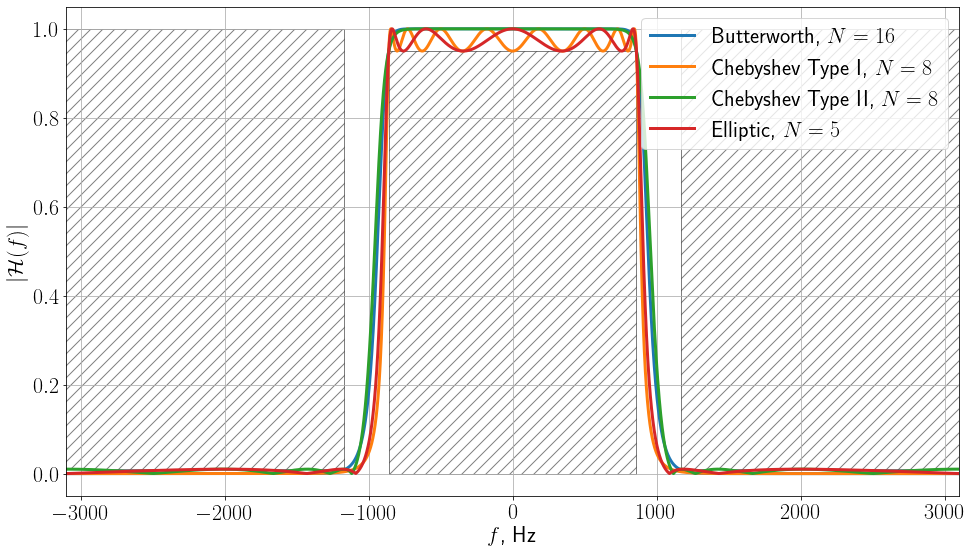

In [28]:
fig, ax = plt.subplots(figsize=(16, 9))

N, Wn = signal.buttord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Butterworth, $N = %d$'%N)

N, Wn = signal.cheb1ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby1(N, Wn=Wn, rp=a_max, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Chebyshev Type I, $N = %d$'%N)

N, Wn = signal.cheb2ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby2(N, Wn=Wn, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Chebyshev Type II, $N = %d$'%N)

N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Elliptic, $N = %d$'%N)

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$|\mathcal{H}(f)|$")
plt.fill_between([-f1, f1], y1 = [0, 0], y2 = [10**(-a_max/20), 10**(-a_max/20)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill_between([f2, fs], y1 = [10**(-a_min/20), 10**(-a_min/20)], y2 = [1, 1], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill_between([-fs, -f2], y1 = [10**(-a_min/20), 10**(-a_min/20)], y2 = [1, 1], edgecolor = 'k', hatch = '//', alpha = 0.5, facecolor = 'white')

plt.grid()
plt.legend(loc='upper right')
plt.show()

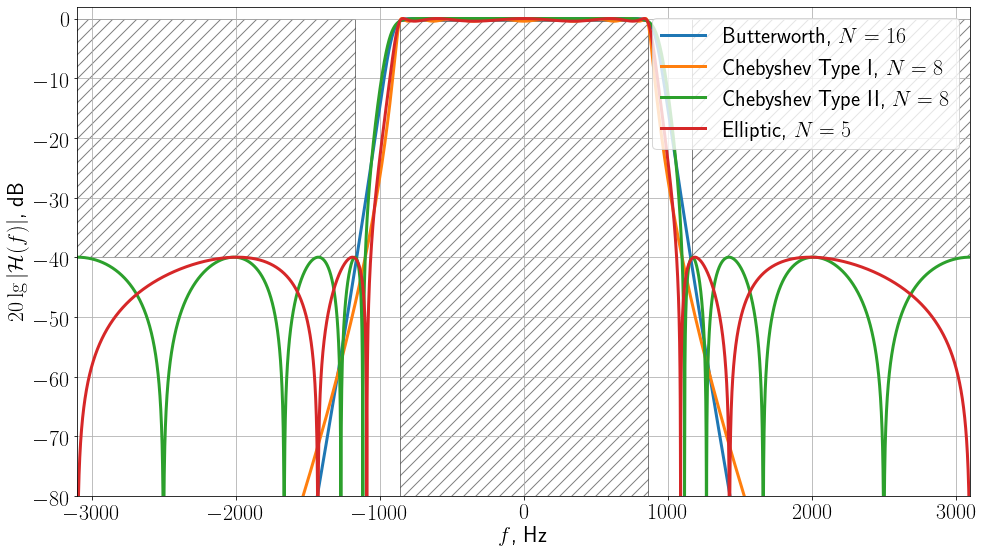

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))

N, Wn = signal.buttord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Butterworth, $N = %d$'%N)

N, Wn = signal.cheb1ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby1(N, Wn=Wn, rp=a_max, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Chebyshev Type I, $N = %d$'%N)

N, Wn = signal.cheb2ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby2(N, Wn=Wn, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Chebyshev Type II, $N = %d$'%N)

N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Elliptic, $N = %d$'%N)

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")
plt.fill_between([-f1, f1], y1 = [-400, -400], y2 = [-a_max, -a_max], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill_between([f2, fs], y1 = [-a_min, -a_min], y2 = [0, 0], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill_between([-fs, -f2], y1 = [-a_min, -a_min], y2 = [0, 0], edgecolor = 'k', hatch = '//', alpha = 0.5, facecolor = 'white')

plt.ylim(-80, 2)
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [13]:
N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
print(signal.tf2sos(beta, alpha))

[[ 0.02650737  0.02650737  0.          1.         -0.63206887  0.        ]
 [ 1.         -0.24418141  1.          1.         -1.22262782  0.62217048]
 [ 1.         -0.89985256  1.          1.         -1.20384225  0.90046475]]


<img src="img/3.png" style="height:450px">

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа, воспользовавшись методом билинейного z-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

Уравнение для одной интегрирующей RC-цепочки: $RC \dfrac{dy}{dt} + y(t) = x(t)$. 
В случае $y(0) = 0$ преобразование Лапласа принимает вид: $RC p \mathcal{Y}(p) + \mathcal{Y}(p) = \mathcal{X}(p)$.


Передаточная функции одной RC-цепочки и каскада из двух RC-цепочек соответственно:
\begin{equation*}
\mathcal{H}_1(p) = \dfrac{\mathcal{Y}(p)}{\mathcal{X}(p)} = \dfrac{1}{1 + RCp},\quad
\mathcal{H}_2(p) = \big(\mathcal{H}_1(p)\big)^2 = \dfrac{1}{\left(1 + RCp\right)^2} = \dfrac{1}{1 + 2RCp + (RCp)^2}.
\end{equation*}

Передаточную функцию $\mathcal{H}(z)$ для цифрового фильтра получим методом билинейного $\mathcal{Z}-$ преобразования соответствующей заменой $p = \dfrac{2}{\Delta t}\dfrac{1-z^{-1}}{1+z^{-1}}:$
$$
\mathcal{H}(z)=\frac{1}{(RC)^{2}\left(\dfrac{2}{\Delta t} \dfrac{1-z^{-1}}{1+z^{-1}}\right)^{2}+2 RC\left(\dfrac{2}{\Delta t} \dfrac{1-z^{-1}}{1+z^{-1}}\right)+1} = 
\dfrac{1+2 z^{-1}+z^{-2}}{4\left(\frac{RC}{\Delta t}\right)^{2}\left(1-2 z^{-1}+z^{-2}\right)+4\left(\frac{RC}{\Delta t}\right)\left(1-z^{-2}\right)+\left(1+2 z^{-1}+z^{-2}\right)} = 
\dfrac{1+2 z^{-1}+z^{-2}}{\left(2\left(\frac{RC}{\Delta t}\right)+1\right)^2+\left(2-8 \left(\frac{RC}{\Delta t}\right)^{2}\right) z^{-1}+\left(2\left(\frac{RC}{\Delta t}\right)-1\right)^2 z^{-2}}.
$$
Разностное уравнение:
$$
x[k]+2 x[k-1]+x[k-2]=\left(2\left(\frac{RC}{\Delta t}\right)+1\right)^2 y[k]+\left(2-8 \left(\frac{RC}{\Delta t}\right)^{2}\right) y[k-1]+\left(2\left(\frac{RC}{\Delta t}\right)-1\right)^2 y[k-2], \quad y[-2] = y[-1] = 0.
$$

<img src="img/4.png" style="height:700px">

In [14]:
RC = 2*1e-3
dt = RC/10

LTI = signal.lti(
    [1],
    [RC**2, 2*RC, 1]
)

DLTI = signal.dlti(
    [1, 2, 1],
    [(2*RC/dt + 1)**2, (2 - 8*(RC/dt)**2), (2*RC/dt - 1)**2],
    dt=dt
)

/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


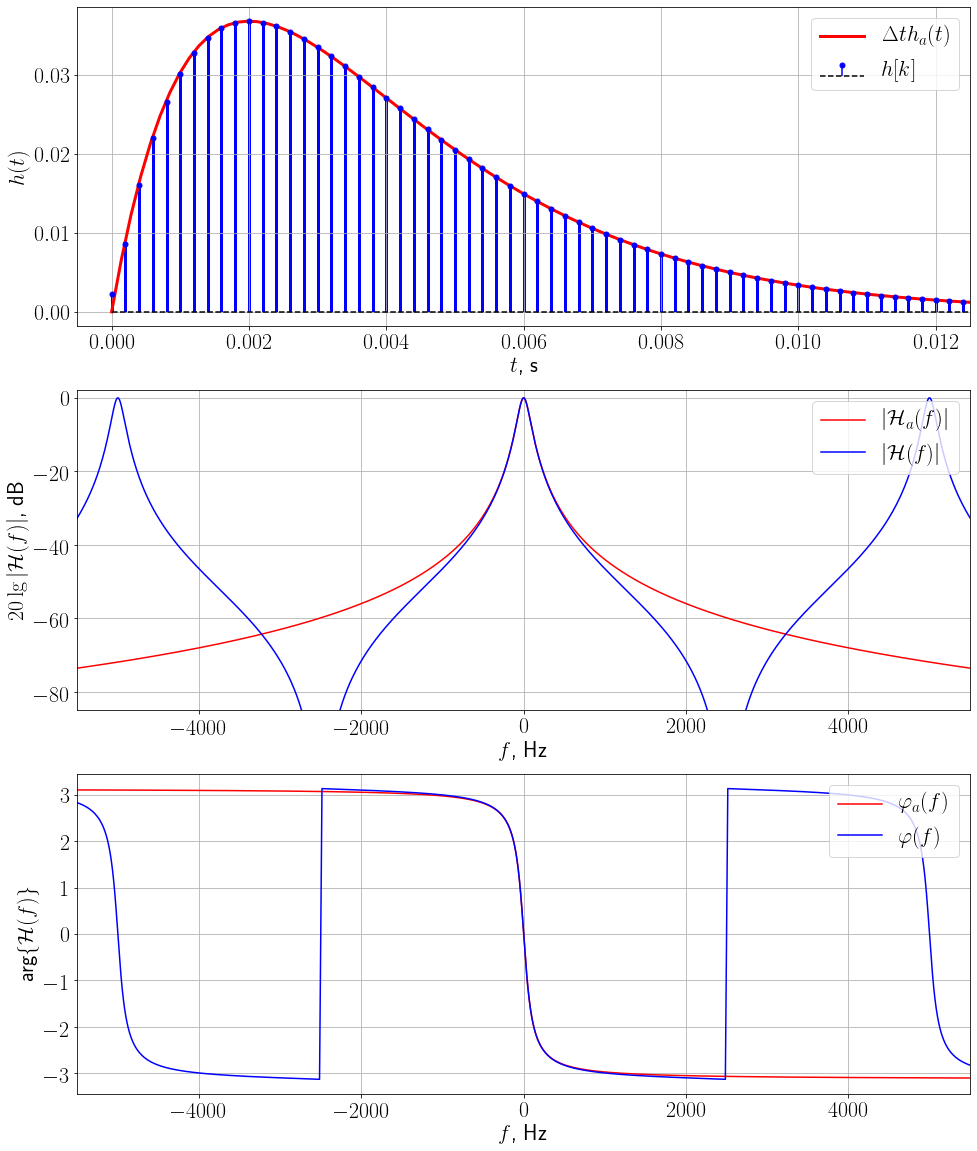

In [15]:
plt.figure(figsize=(16,20))

plt.subplot(311)
t, h_a = signal.impulse(LTI)
plt.plot(t, h_a*dt, 'r', lw=3, label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(DLTI, n=100)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 5)

plt.grid()
plt.xlim([-0.0005, 0.0125])
plt.xlabel("$t$, s")
plt.ylabel("$h(t)$")
plt.legend(loc = 'upper right')

plt.subplot(312)

w_a, H_a = signal.freqresp(LTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000)/dt)
theta_d, H_d = signal.dfreqresp(DLTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000))

plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "r", label="$|\mathcal{H}_a(f)|$")
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), "b", label="$|\mathcal{H}(f)|$")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")
plt.xlabel("$f$, Hz")
plt.ylim(-85, 2)
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(313)

plt.plot(w_a/(2*np.pi), np.angle(H_a), "r", label="$\\varphi_a(f)$")
plt.plot(theta_d/(2*np.pi*dt), np.angle(H_d), "b", label="$\\varphi(f)$")
plt.ylabel("arg$\{\mathcal{H}(f)\}$")
plt.xlabel("$f$, Hz")
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа, воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

Уравнение для одной интегрирующей RC-цепочки: $RC \dfrac{dy}{dt} + y(t) = x(t)$. 
В случае $y(0) = 0$ преобразование Лапласа принимает вид: $RC p \mathcal{Y}(p) + \mathcal{Y}(p) = \mathcal{X}(p)$.


Передаточная функции одной RC-цепочки и каскада из двух RC-цепочек соответственно:
\begin{equation*}
\mathcal{H}_1(p) = \dfrac{\mathcal{Y}(p)}{\mathcal{X}(p)} = \dfrac{1}{1 + RCp},\quad
\mathcal{H}_2(p) = \big(\mathcal{H}_1(p)\big)^2 = \dfrac{1}{\left(1 + RCp\right)^2} = \dfrac{1}{1 + 2RCp + (RCp)^2}.
\end{equation*}

Вычислим обратное преобразование Лапласа:
\begin{align*}
h_a(t) &= \dfrac{1}{2 \pi j} \oint \limits_{\gamma} \mathcal{H}_2(p) e^{pt} dp = 
\dfrac{1}{2 \pi j} \oint \limits_{\gamma} \dfrac{e^{pt} dp}{\left(1 + RCp\right)^2} = 
\underset{p_p = -1/RC}{\text{res}} \left\{\dfrac{e^{pt}}{(1 + RCp)^2}\right\} =
\dfrac{1}{(RC)^2}\underset{p_p = -1/RC}{\text{res}} \left\{\dfrac{e^{pt}}{\left(p - (-\frac{1}{RC})\right)^2}\right\} =
\dfrac{1}{(RC)^2} \lim \limits_{p \to -1/RC} \left\{\dfrac{de^{pt}}{dp}\right\} =
\dfrac{t}{(RC)^2} \exp\left(-\dfrac{t}{RC}\right).
\end{align*}

Получим импульсную характеристику цифрового фильтра:
\begin{align*}
h[k] &= \Delta t \cdot h_a(k \Delta t) = \dfrac{k (\Delta t)^2}{(RC)^2} \exp\left(-\dfrac{k \Delta t}{RC}\right).
\end{align*}


Наконец, передаточная функция искомого цифрового фильтра:
\begin{align*}
\mathcal{H}(z) &= \sum \limits_{k=0}^{+\infty}h[k]z^{-k} = \sum \limits_{k=0}^{+\infty} \dfrac{k (\Delta t)^2}{(RC)^2} \exp\left(-\dfrac{k \Delta t}{RC}\right) z^{-k} = 
\left(\dfrac{\Delta t}{RC}\right)^2 \sum \limits_{k=0}^{+\infty} k
\left(\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1} \right)^k =
\left(\dfrac{\Delta t}{RC}\right)^2 \sum \limits_{k=0}^{+\infty} k \alpha^k = 
\left(\dfrac{\Delta t}{RC}\right)^2 \dfrac{d}{d\alpha} \left\{ \sum \limits_{k=0}^{+\infty} \alpha^k \right\} = \\ &=
\left(\dfrac{\Delta t}{RC}\right)^2 \dfrac{d}{d\alpha} \left\{\dfrac{1}{1 - \alpha} \right\} = 
\left(\dfrac{\Delta t}{RC}\right)^2 \dfrac{\alpha}{(1 - \alpha)^2} = 
\left(\dfrac{\Delta t}{RC}\right)^2 \dfrac{\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1} }{\left(1 - \exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1} \right)^2} =
\dfrac{\left(\dfrac{\Delta t}{RC}\right)^2 \exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1}}{1 - 2\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1} + \exp\left(-\dfrac{2\Delta t}{RC}\right) z^{-2}}
, \quad \Big|\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1}\Big| < 1.
\end{align*}

Разностное уравнение принимает вид:
\begin{align*}
\left(\dfrac{\Delta t}{RC}\right)^2 \exp\left(-\dfrac{\Delta t}{RC}\right) x[k-1] = y[k] - 2\exp\left(-\dfrac{\Delta t}{RC}\right) y[k-1] + \exp\left(-\dfrac{2\Delta t}{RC}\right) y[k-2],\quad y[-2] = y[-1] = 0.
\end{align*}

<img src="img/5.png" style="height:700px">

In [16]:
RC = 2*1e-3
dt = RC/10

LTI = signal.lti(
    [1],
    [RC**2, 2*RC, 1]
)

DLTI = signal.dlti(
    [0, (dt/RC)**2 * np.exp(-dt/RC), 0],
    [1, -2*np.exp(-dt/RC), np.exp(-2*dt/RC)],
    dt=dt
)

/home/despair/anaconda3/lib/python3.7/site-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


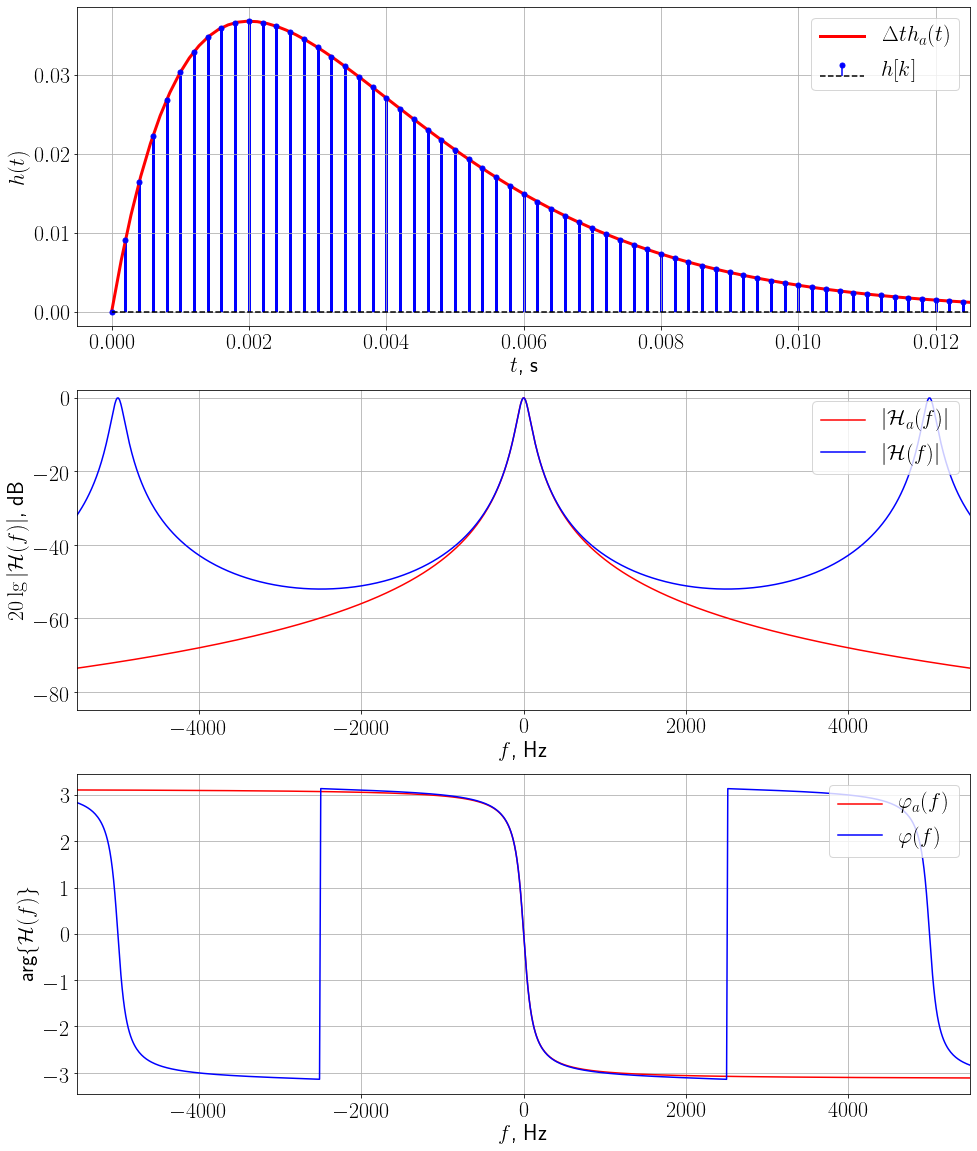

In [17]:
plt.figure(figsize=(16,20))

plt.subplot(311)
t, h_a = signal.impulse(LTI)
plt.plot(t, h_a*dt, 'r', lw=3, label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(DLTI, n=100)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 5)

plt.grid()
plt.xlim([-0.0005, 0.0125])
plt.xlabel("$t$, s")
plt.ylabel("$h(t)$")
plt.legend(loc = 'upper right')

plt.subplot(312)

w_a, H_a = signal.freqresp(LTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000)/dt)
theta_d, H_d = signal.dfreqresp(DLTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000))

plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "r", label="$|\mathcal{H}_a(f)|$")
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), "b", label="$|\mathcal{H}(f)|$")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")
plt.xlabel("$f$, Hz")
plt.ylim(-85, 2)
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(313)

plt.plot(w_a/(2*np.pi), np.angle(H_a), "r", label="$\\varphi_a(f)$")
plt.plot(theta_d/(2*np.pi*dt), np.angle(H_d), "b", label="$\\varphi(f)$")
plt.ylabel("arg$\{\mathcal{H}(f)\}$")
plt.xlabel("$f$, Hz")
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

Возьмём несколько ($n$) IIR фильтров, моделирующих отражение от поверхности (то есть эхо) с передаточными функциями вида:
$$
\mathcal{H}_{i}^{echo}(z) = \dfrac{z^{-N_i}}{1 - c_i z^{-N_i}}.
$$

Пусть $n=3$, тогда параллельное соединение этих фильтров даёт следующее соотношение для передаточной функции:
$$
\mathcal{H}^{echo}(z) = \sum \limits_{i=1}^{3} \mathcal{H}_{i}^{echo}(z) = \dfrac{z^{-N_1}}{1 - c_1 z^{-N_1}} + \dfrac{z^{-N_2}}{1 - c_2 z^{-N_2}} + \dfrac{z^{-N_3}}{1 - c_3 z^{-N_3}} = \dfrac{z^{-N_1}(1 - c_2 z^{-N_2})(1 - c_3 z^{-N_3}) + z^{-N_2}(1 - c_1 z^{-N_1})(1 - c_3 z^{-N_3}) + z^{-N_3}(1 - c_1 z^{-N_1})(1 - c_2 z^{-N_2})}{(1 - c_1 z^{-N_1})(1 - c_2 z^{-N_2})(1 - c_3 z^{-N_3})} = \\
= \dfrac{z^{-N_1} - c_2 z^{-(N_1 + N_2)} - c_3 z^{-(N_1 + N_3)} + c_2 c_3 z^{-(N_1 + N_2 + N_3)} + 
z^{-N_2} - c_1 z^{-(N_1 + N_2)} - c_3 z^{-(N_2 + N_3)} + c_1 c_3 z^{-(N_1 + N_2 + N_3)} + 
z^{-N_3} - c_1 z^{-(N_1 + N_3)} - c_2 z^{-(N_2 + N_3)} + c_1 c_2 z^{-(N_1 + N_2 + N_3)}}
{1 - c_1 z^{-N_1} - c_2 z^{-N_2} - c_3 z^{-N_3} + c_1 c_2 z^{-(N_1 + N_2)} + c_1 c_3 z^{-(N_1 + N_3)} + c_2 c_3 z^{-(N_2 + N_3)} - c_1 c_2 c_3 z^{-(N_1 + N_2 + N_3)}} =\\
= \dfrac{z^{-N_1} + z^{-N_2} + z^{-N_3} 
- (c_1 + c_2) z^{-(N_1 + N_2)} - (c_1 + c_3) z^{-(N_1 + N_3)} - (c_2 + c_3) z^{-(N_2 + N_2)} + 
(c_1 c_2 + c_1 c_3 + c_2 c_3) z^{-(N_1 + N_2 + N_3)}} 
{1 - c_1 z^{-N_1} - c_2 z^{-N_2} - c_3 z^{-N_3} + c_1 c_2 z^{-(N_1 + N_2)} + c_1 c_3 z^{-(N_1 + N_3)} + c_2 c_3 z^{-(N_2 + N_3)} - c_1 c_2 c_3 z^{-(N_1 + N_2 + N_3)}}.
$$

In [18]:
N1 = 10000
N2 = 15500
N3 = 49000

c1 = 0.6
c2 = 0.6
c3 = 0.1

nominator = np.zeros(N1 + N2 + N3 + 1)
denominator = np.zeros(N1 + N2 + N3 + 1)

nominator[N1] = 1.
nominator[N2] = 1.
nominator[N3] = 1.
nominator[N1 + N2] = -(c1 + c2)
nominator[N1 + N3] = -(c2 + c3)
nominator[N2 + N3] = -(c2 + c3)
nominator[N1 + N2 + N3] = (c1*c2 + c1*c3 + c2*c3)

denominator[0] = 1.
denominator[N1] = -c1
denominator[N2] = -c2
denominator[N3] = -c3
denominator[N1 + N2] = c1*c2
denominator[N1 + N3] = c1*c3
denominator[N2 + N3] = c2*c3
denominator[N1 + N2 + N3] = -c1*c2*c3

b_e = nominator
a_e = denominator

Чтобы сделать эхо более "живым" и расплывчатым, добавим эффект реверберации, который моделируется при помощи нескольких ($k$) allpass-фильтров с передаточными функциями вида:
$$
\mathcal{H}_{i}^{allpass}(z) = \dfrac{d_i + z^{-K_i}}{1 + d_i z^{-K_i}}.
$$

Пусть $k=2$, тогда при последовательном соединении allpass-фильтров имеем:
$$
\mathcal{H}^{allpass}(z) = \prod \limits_{i=1}^{2} \dfrac{d_i + z^{-K_i}}{1 + d_i z^{-K_i}} = \dfrac{d_1 + z^{-K_1}}{1 + d_1 z^{-K_1}} \cdot \dfrac{d_2 + z^{-K_2}}{1 + d_2 z^{-K_2}} = 
\dfrac{d_1 d_2 + d_2 z^{-K_1} + d_2 z^{K_2} + z^{-(K_1 + K_2)}}{1 + d_1 z^{-K_1} + d_2 z^{-K_2} + d_1 d_2 z^{-(K_1 + K_2)}}.
$$

In [19]:
K1 = 3700
K2 = 5900

d1 = 0.4
d2 = 0.27

nominator = np.zeros(K1 + K2 + 1)
denominator = np.zeros(K1 + K2 + 1)

nominator[0] = d1*d2
nominator[K1] = d2
nominator[K2] = d1
nominator[K1 + K2] = 1

denominator[0] = 1
denominator[K1] = d1
denominator[K2] = d2
denominator[K1 + K2] = d1*d2

b_ap = nominator
a_ap = denominator

<center>
После чего соединяем echo и allpass каскады последовательным образом, что экивавалентно последовательному прохождению исходного сигнала через оба каскада.
    
<img src="img/6.png" style="height:750px">

In [20]:
x, fs = sf.read('input.wav')
x = np.hstack([x, np.zeros(x.size*19)])
y = signal.lfilter(b = b_ap, a = a_ap, x= signal.lfilter(b = b_e, a = a_e, x=x))

scipy.io.wavfile.write(filename='output.wav', rate=fs, data=np.array(y))